In [6]:
import pandas as pd
import numpy as np

# Load dataset from GitHub mirror (CSV format)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, names=columns)

# Replace 0s with NaN in columns that shouldn't be 0
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Show missing values count
print("Missing values before filling:")
print(df.isnull().sum())

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Show that missing values are handled
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values before filling:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Fill missing values using column mean
df.fillna(df.mean(), inplace=True)

# Show missing values count after filling
print("\n✅ Missing values after filling:")
print(df.isnull().sum())



✅ Missing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = df.duplicated()
print("🔍 Number of duplicate rows:", duplicates.sum())

# Optional: View the duplicates (if any)
if duplicates.sum() > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm removal
print("\n✅ New shape after removing duplicates:", df.shape)


🔍 Number of duplicate rows: 0

✅ New shape after removing duplicates: (768, 9)


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Drop the target column 'Outcome' while scaling features
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# --- Normalization (Min-Max Scaling) ---
minmax_scaler = MinMaxScaler()
normalized = minmax_scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized, columns=features.columns)

print("🔹 Normalized Data (0 to 1 scale):")
print(normalized_df.head())

# --- Standardization (Z-score Scaling) ---
standard_scaler = StandardScaler()
standardized = standard_scaler.fit_transform(features)
standardized_df = pd.DataFrame(standardized, columns=features.columns)

print("\n🔹 Standardized Data (mean=0, std=1):")
print(standardized_df.head())


🔹 Normalized Data (0 to 1 scale):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  

🔹 Standardized Data (mean=0, std=1):
   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


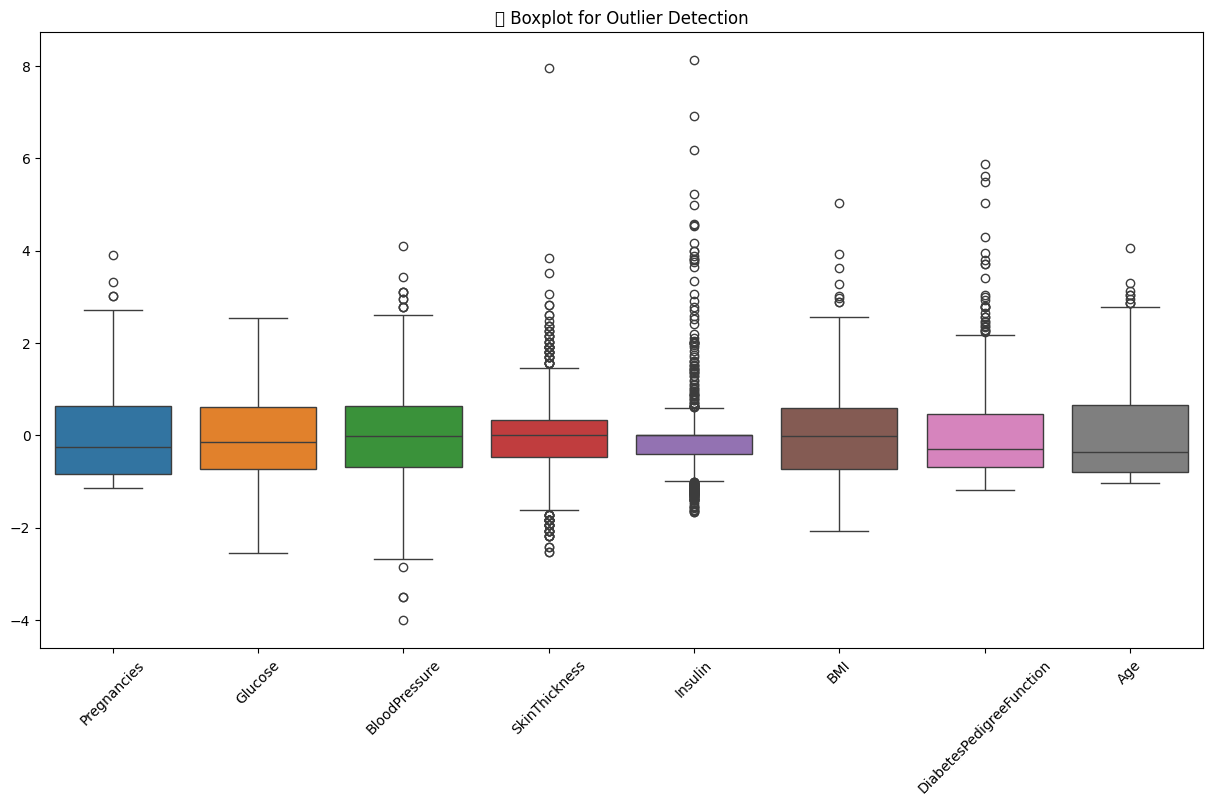

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use standardized data for visualization
data = standardized_df.copy()

# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title("🔍 Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


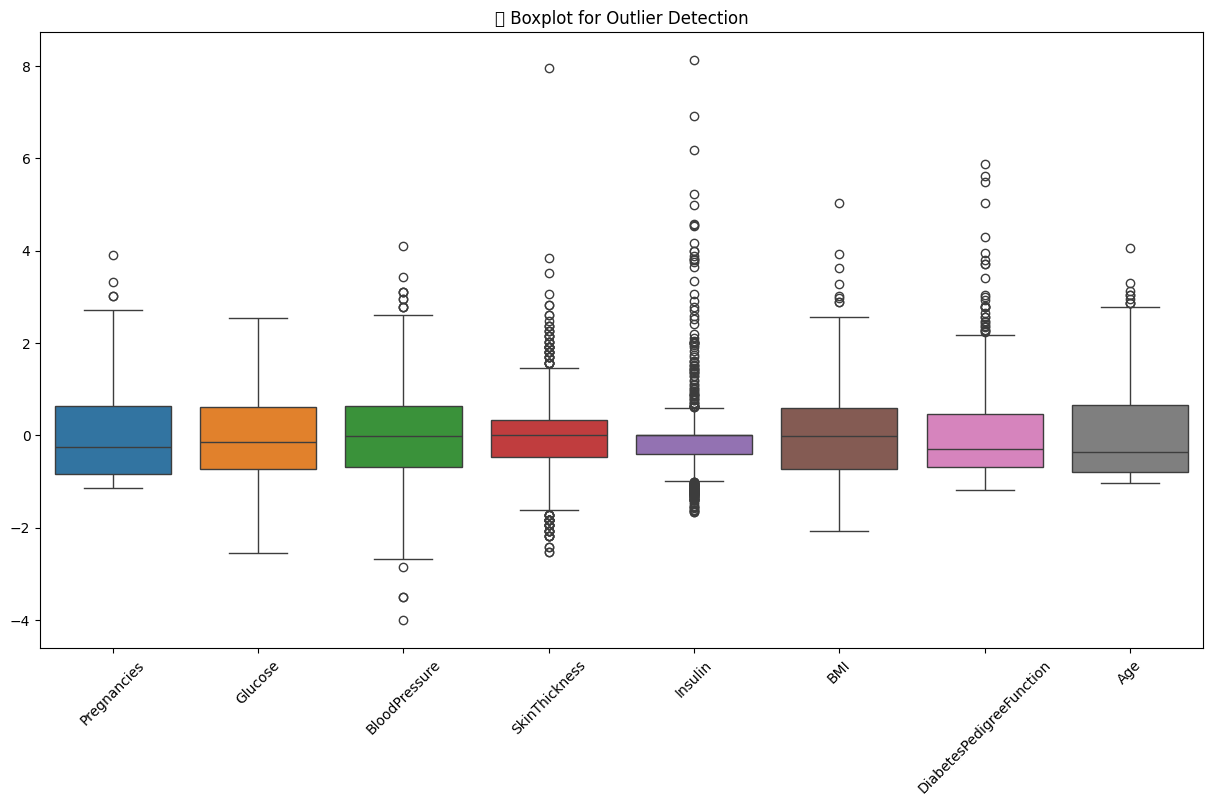

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use standardized data for visualization
data = standardized_df.copy()

# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title("🔍 Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [14]:
# IQR-based outlier removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


/tmp/ipython-input-15-2097316437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Outcome'] = df['Outcome']
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


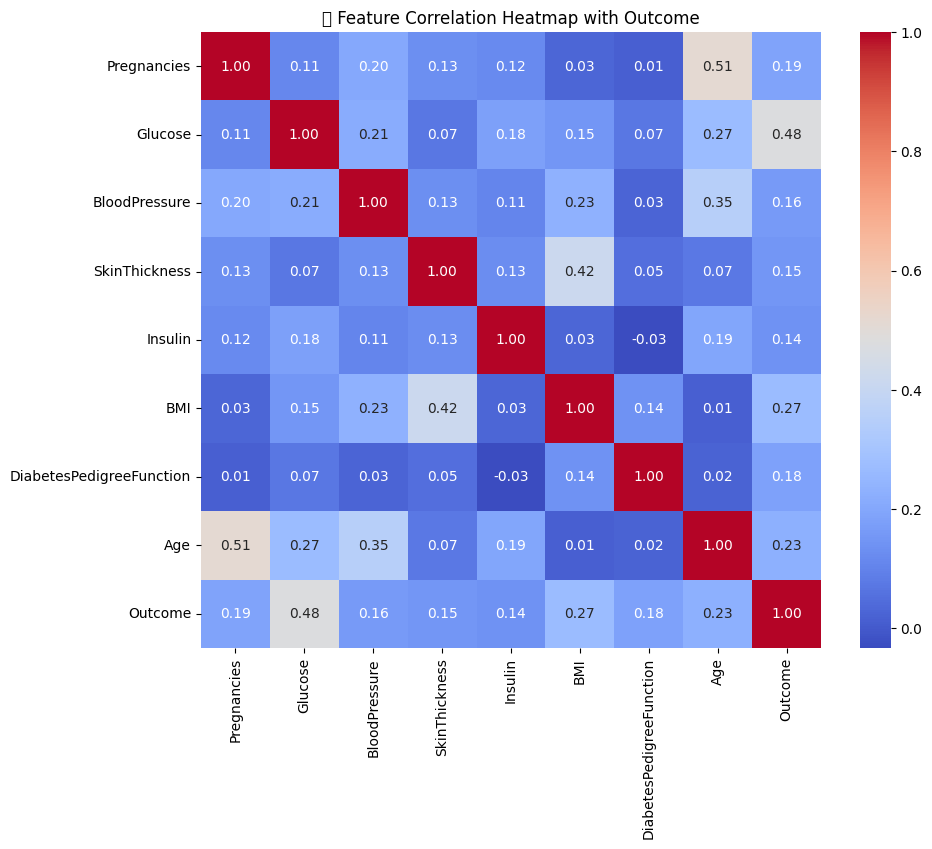

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add back the Outcome column if needed
df_no_outliers['Outcome'] = df['Outcome']

# Compute correlation matrix
corr = df_no_outliers.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Feature Correlation Heatmap with Outcome")
plt.show()


In [16]:
# Select top 5 features based on correlation
selected_columns = ['Glucose', 'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']

# Final dataset with only top features
df_selected = df[selected_columns]

print("✅ New shape of selected feature dataset:", df_selected.shape)
print(df_selected.head())


✅ New shape of selected feature dataset: (768, 6)
   Glucose  Age   BMI  Pregnancies  DiabetesPedigreeFunction  Outcome
0    148.0   50  33.6            6                     0.627        1
1     85.0   31  26.6            1                     0.351        0
2    183.0   32  23.3            8                     0.672        1
3     89.0   21  28.1            1                     0.167        0
4    137.0   33  43.1            0                     2.288        1


In [17]:
# Create bins for Age
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle-aged', 'Old']
df_selected['Age_Group'] = pd.cut(df_selected['Age'], bins=age_bins, labels=age_labels)

# Create bins for Glucose
glucose_bins = [0, 90, 140, 200]
glucose_labels = ['Low', 'Normal', 'High']
df_selected['Glucose_Level'] = pd.cut(df_selected['Glucose'], bins=glucose_bins, labels=glucose_labels)

# Show result
print(df_selected[['Age', 'Age_Group', 'Glucose', 'Glucose_Level']].head())


   Age    Age_Group  Glucose Glucose_Level
0   50  Middle-aged    148.0          High
1   31  Middle-aged     85.0           Low
2   32  Middle-aged    183.0          High
3   21        Young     89.0           Low
4   33  Middle-aged    137.0        Normal


/tmp/ipython-input-17-2124975322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age_Group'] = pd.cut(df_selected['Age'], bins=age_bins, labels=age_labels)
/tmp/ipython-input-17-2124975322.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Glucose_Level'] = pd.cut(df_selected['Glucose'], bins=glucose_bins, labels=glucose_labels)


In [18]:
from sklearn.model_selection import train_test_split

# Drop non-numeric columns (like Age_Group, Glucose_Level)
X = df_selected.drop(['Outcome', 'Age_Group', 'Glucose_Level'], axis=1)
y = df_selected['Outcome']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show result
print("✅ Training Set Shape:", X_train.shape)
print("✅ Testing Set Shape:", X_test.shape)


✅ Training Set Shape: (614, 5)
✅ Testing Set Shape: (154, 5)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


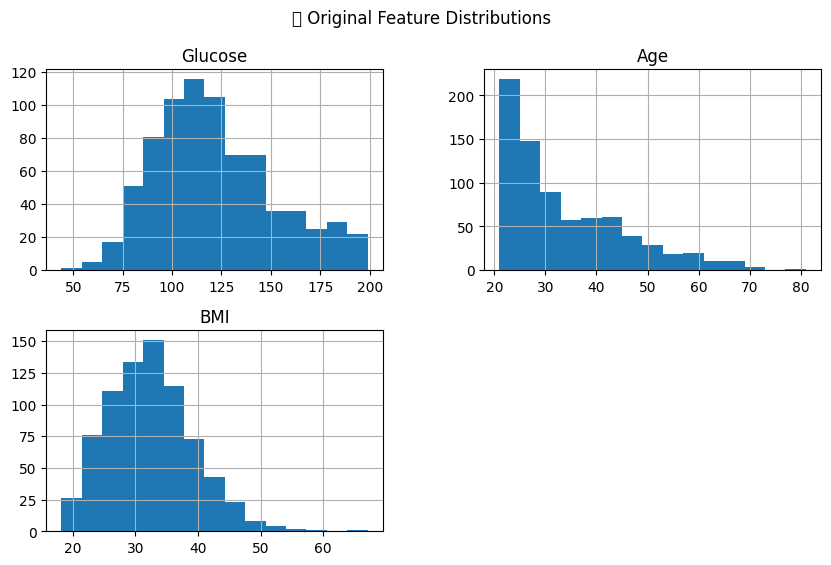

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


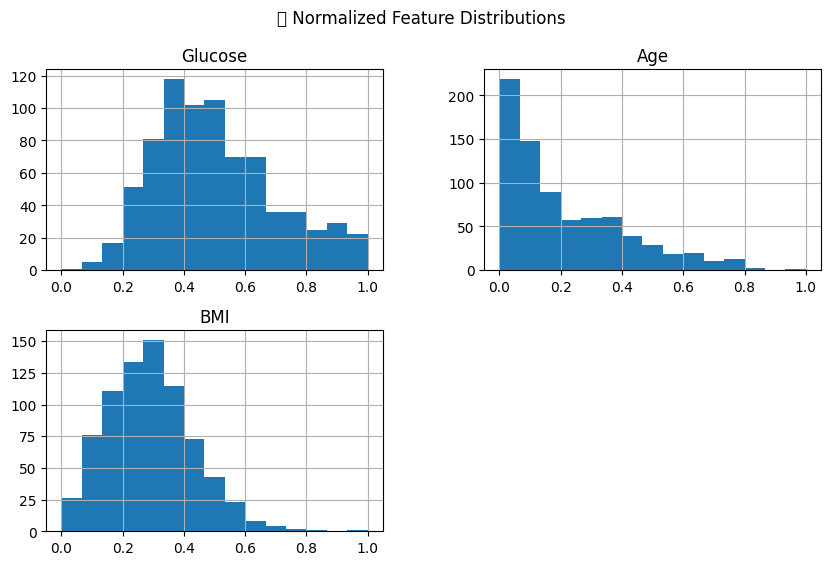

In [19]:
import matplotlib.pyplot as plt

# Plot histograms of original vs scaled features
df[['Glucose', 'Age', 'BMI']].hist(figsize=(10, 6), bins=15)
plt.suptitle("📊 Original Feature Distributions")
plt.show()

normalized_df[['Glucose', 'Age', 'BMI']].hist(figsize=(10, 6), bins=15)
plt.suptitle("📊 Normalized Feature Distributions")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


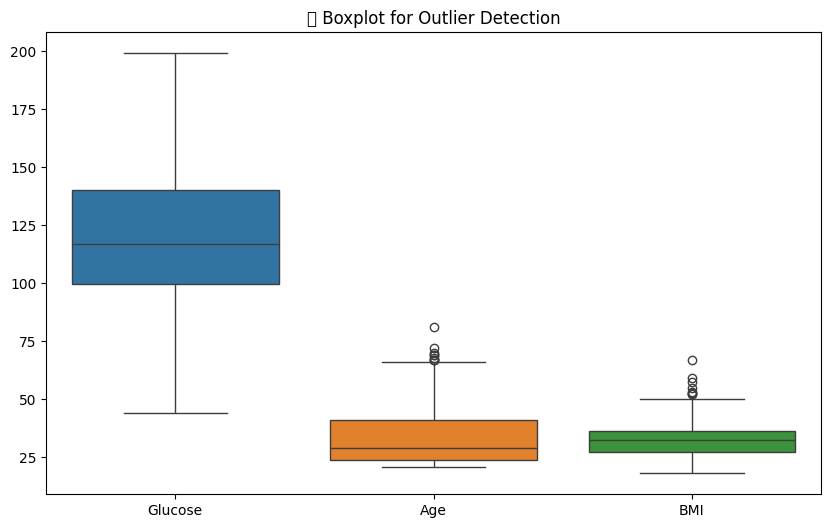

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Glucose', 'Age', 'BMI']])
plt.title("📦 Boxplot for Outlier Detection")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


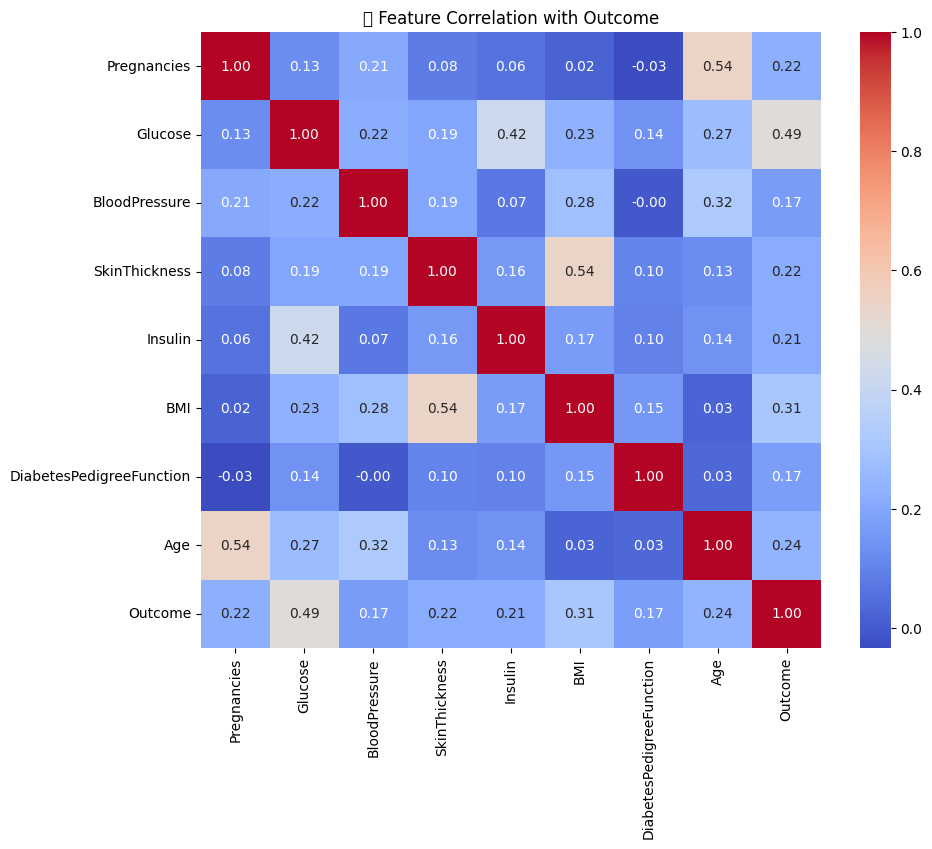

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔥 Feature Correlation with Outcome")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


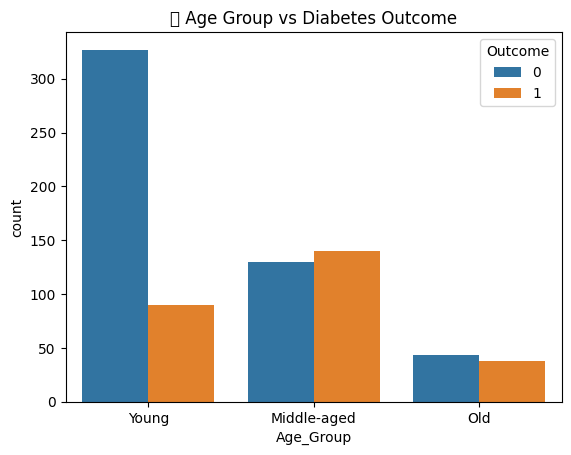

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127853 (\N{LOLLIPOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


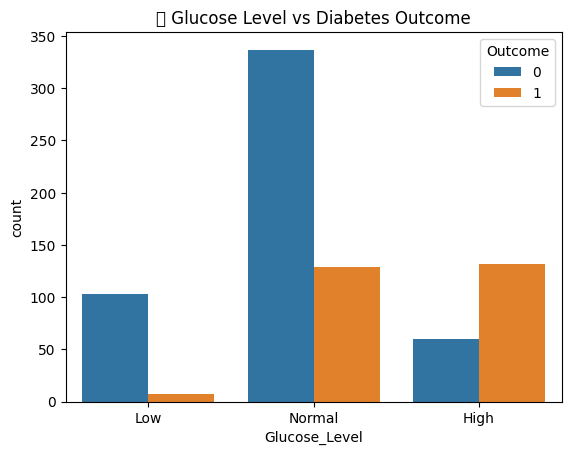

In [22]:
sns.countplot(x='Age_Group', hue='Outcome', data=df_selected)
plt.title("👶 Age Group vs Diabetes Outcome")
plt.show()

sns.countplot(x='Glucose_Level', hue='Outcome', data=df_selected)
plt.title("🍭 Glucose Level vs Diabetes Outcome")
plt.show()


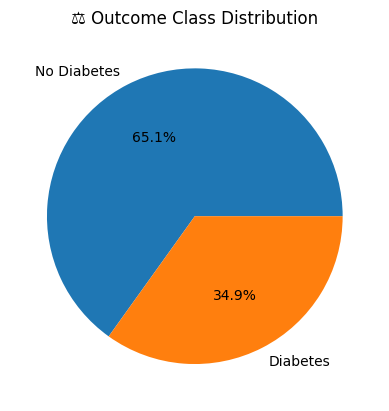

In [23]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No Diabetes', 'Diabetes'])
plt.title("⚖️ Outcome Class Distribution")
plt.ylabel("")
plt.show()
